## IMPORTING LIBRARIES

In [53]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## IM USING API KEYS TO GET THE DATA DIRECTLY

In [54]:
Consumer_Key = "RKBRBWsdBpQ1KdyMXvv3sLQYa"
Consumer_Secret_Key = "n3suc4b3Vzlyilnh86EvNKU8F2BmOyDhXq2ceWXKsLvnqYl25u"
Access_Token = "946509368010215424-XgSzYei9mWXtMim5YMBQaUX0HyWm2cH"
Access_Token_Secret = "U0yUmaVDmvZdzoihRO78OZIDupfaDLA5PaEVFfGsdiB43"

## API 


In [55]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

## INPUT NAME OR HASHTAG YOU WANT TO FETCH THE TWEETS ABOUT


In [56]:
    posts = tweepy.Cursor(api.user_timeline,screen_name="BarackObama",count=None,since_id=None,max_id=None,trim_user=True,exclude_replies=True,contributor_details=False,include_entities=False).items(50);


### CREATING DATABASE


In [57]:
df = pd.DataFrame(data=[tweet.text for tweet in posts], columns=['Tweet'])

Unexpected parameter: contributor_details
Unexpected parameter: include_entities
Unexpected parameter: contributor_details
Unexpected parameter: include_entities
Unexpected parameter: contributor_details
Unexpected parameter: include_entities
Unexpected parameter: contributor_details
Unexpected parameter: include_entities


In [58]:
for col in df.columns:
    print(col)

Tweet


In [59]:
df.head()


,Tweet
0,"Five years ago during my Farewell Address, I a..."
1,It was a great honor to pay tribute to my frie...
2,Through his groundbreaking roles and singular ...
3,"One year ago, a violent attack on our Capitol ..."
4,I’m hopeful about 2022. This year will undoubt...


### CLEANING TWEETS

#### REMOVING HASHTAGS,COLONS ETC


In [60]:
def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

In [61]:
df['Tweet'] = df['Tweet'].apply(cleanUpTweet)

In [62]:
df

,Tweet
0,"Five years ago during my Farewell Address, I a..."
1,It was a great honor to pay tribute to my frie...
2,Through his groundbreaking roles and singular ...
3,"One year ago, a violent attack on our Capitol ..."
4,I’m hopeful about 2022. This year will undoubt...
5,"Betty White broke barriers, defied expectation..."
6,If you're feeling discouraged about our democr...
7,"When Harry Reid was nearing the end, his wife ..."
8,Congrats to all the scientists and engineers i...
9,"Archbishop Desmond Tutu was a mentor, a friend..."


### GETTING SUBJECTIVITY AND POLARITY SCORE

In [63]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [64]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [65]:
df['Subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['Polarity'] = df['Tweet'].apply(getPolarity)

In [66]:
df

,Tweet,Subjectivity,Polarity
0,"Five years ago during my Farewell Address, I a...",0.000000,0.000000
1,It was a great honor to pay tribute to my frie...,0.450000,0.366667
2,Through his groundbreaking roles and singular ...,0.000000,0.000000
3,"One year ago, a violent attack on our Capitol ...",0.470833,-0.175000
4,I’m hopeful about 2022. This year will undoubt...,0.000000,0.000000
5,"Betty White broke barriers, defied expectation...",0.050000,0.150000
6,If you're feeling discouraged about our democr...,0.000000,0.000000
7,"When Harry Reid was nearing the end, his wife ...",0.000000,0.000000
8,Congrats to all the scientists and engineers i...,1.000000,0.800000
9,"Archbishop Desmond Tutu was a mentor, a friend...",0.250000,0.166667


In [67]:
def getAnalysis(score): 

    if score < 0:
        return 'Negative' 
    elif score == 0: 
        return 'Neutral' 
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [68]:
df

,Tweet,Subjectivity,Polarity,Analysis
0,"Five years ago during my Farewell Address, I a...",0.000000,0.000000,Neutral
1,It was a great honor to pay tribute to my frie...,0.450000,0.366667,Positive
2,Through his groundbreaking roles and singular ...,0.000000,0.000000,Neutral
3,"One year ago, a violent attack on our Capitol ...",0.470833,-0.175000,Negative
4,I’m hopeful about 2022. This year will undoubt...,0.000000,0.000000,Neutral
5,"Betty White broke barriers, defied expectation...",0.050000,0.150000,Positive
6,If you're feeling discouraged about our democr...,0.000000,0.000000,Neutral
7,"When Harry Reid was nearing the end, his wife ...",0.000000,0.000000,Neutral
8,Congrats to all the scientists and engineers i...,1.000000,0.800000,Positive
9,"Archbishop Desmond Tutu was a mentor, a friend...",0.250000,0.166667,Positive


### PRINTING NEGETIVE TWEETS

In [69]:
print(' Printing negative tweets:\n') 
j=1 
sortedDF = df.sort_values(by=['Polarity'] , ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+sortedDF['Tweet'][i])
        print()
        j=j+1 

 Printing negative tweets:

1) One year ago, a violent attack on our Capitol made it clear just how fragile the American experiment in democracy r… 

2) Merry Christmas, everybody! This year, I got a little help spreading holiday cheer from Sunny. Wishing you all a pe… 

3) The epidemic of gun violence in America has gotten worse during the pandemic. This article points to the ways in wh… 

4) In a country as large and diverse as ours, progress can often feel frustrating and slow, with small victories accom… 



### PRINTING POSITIVE TWEETS

In [70]:
print('Printing Positive tweets:\n') 
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=True) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+sortedDF['Tweet'][i])
        print()
        j=j+1 

Printing Positive tweets:

1) It was a great honor to pay tribute to my friend, Harry Reid. Few people have done more for Nevada and our country… 

2) Betty White broke barriers, defied expectations, served her country, and pushed us all to laugh. Barack and I join so ma…

3) Congrats to all the scientists and engineers involved with launching this once-in-a-generation telescope! Proud my… 

4) Archbishop Desmond Tutu was a mentor, a friend, and a moral compass for me and so many others. A universal spirit,… 

5) Dr. Fauci and former President Obama visited Kimball Elementary School to talk about the importance of COVID vaccines for kids…

6) I thought I knew Green Eggs and Ham better than most people, but at Kimball Elementary’s vaccination site earlier t… 

7) Proud of the South Side Wolfpack team for all their hard work and dedication this season! 

8) I'm inspired by the stories of progress that came from 2021—especially the example set by a new generation of young… 

9) Over the n

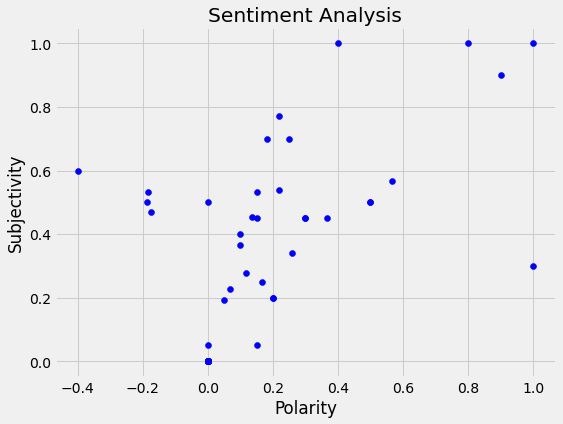

In [71]:
plt.figure(figsize=(8,6))
for i in range (0, df.shape[0]):
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i],color='Blue')
    #plt.scatter(x,y,color)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [72]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweet']
ptweets

1     It was a great honor to pay tribute to my frie...
5     Betty White broke barriers, defied expectation...
8     Congrats to all the scientists and engineers i...
9     Archbishop Desmond Tutu was a mentor, a friend...
11    Dr. Fauci and former President Obama visited K...
12    I thought I knew Green Eggs and Ham better tha...
14    Proud of the South Side Wolfpack team for all ...
15    I'm inspired by the stories of progress that c...
16    Over the next few days, I'll share my annual l...
19    Last week, powerful tornadoes devastated commu...
20    Michelle and I loved being back in Chicago las...
21    As Chancellor, Angela Merkel served with integ...
27    Shots are never fun, but the kids I met at Kim...
29    Getting our kids fully vaccinated is the best ...
30    I’m always inspired by young leaders like Rach...
31    From our family to yours, Happy Hanukkah and C...
33    Happy Thanksgiving! Michelle and I send our wa...
34    Happy birthday to my friend and my brother

In [73]:
round((ptweets.shape[0]/df.shape[0])*100,1)

56.0

In [74]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweet']
ntweets

3     One year ago, a violent attack on our Capitol ...
10    Merry Christmas, everybody! This year, I got a...
37    The epidemic of gun violence in America has go...
49    In a country as large and diverse as ours, pro...
Name: Tweet, dtype: object

In [75]:
round((ntweets.shape[0]/df.shape[0])*100,1)



8.0

In [76]:
df['Analysis'].value_counts()

Positive    28
Neutral     18
Negative     4
Name: Analysis, dtype: int64

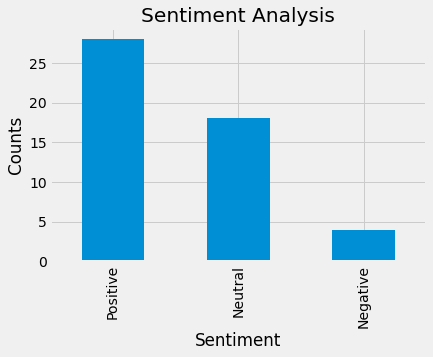

In [77]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

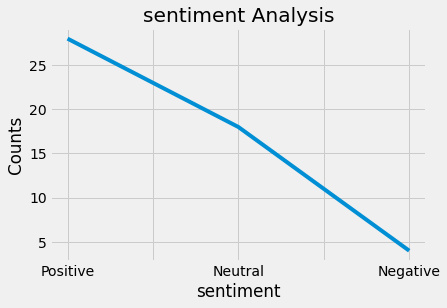

In [78]:
plt.title('sentiment Analysis')
plt.xlabel('sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()